# Check augmentation pipeline results

In [31]:

import os

os.chdir("/home/aneta/Desktop/GSN/code/edge-aware-face-autoencoder")

In [32]:
!pwd

/home/aneta/Desktop/GSN/code/edge-aware-face-autoencoder


In [33]:
import albumentations as A
import matplotlib.pyplot as plt

from scripts.training import augmentations as aug
from scripts.training import data_loading as dl

%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
DATASET_PATH = os.path.join(os.getcwd(), "data", "dataset", "train")

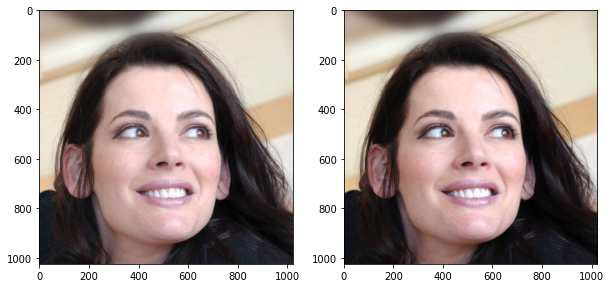

In [35]:
dataset = dl.CelebAFaceAutoencoderDataset(
    dataset_root=DATASET_PATH,
)
img = dataset[48]

fig, axis = plt.subplots(1, 2, figsize=(10, 20))
axis[0].imshow(img)

brightness = A.RandomBrightnessContrast(brightness_limit=0.5, p=1)
channel_shuffle = A.ChannelShuffle(p=1)
clahe = A.CLAHE(clip_limit=2.0, tile_grid_size=(4, 4), p=1)
color_jitter = A.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2, p=1)
downscale = A.Downscale(scale_min=0.25, scale_max=0.25, interpolation=0, p=1)  # nie
equalize = A.Equalize(mode="cv", by_channels=True, mask=None, mask_params=(), p=1)
fancyPCA = A.FancyPCA(alpha=0.15, p=1)
flip = A.Flip(p=1)  # nie
gaussian_noise = A.GaussNoise(var_limit=(10.0, 50.0), mean=0, per_channel=True, p=1)
grid_distortion = A.GridDistortion(
    num_steps=1,
    distort_limit=0.1,
    interpolation=1,
    border_mode=4,
    value=None,
    mask_value=None,
    p=1,
)  # nie
horizontal_flip = A.HorizontalFlip(p=1)
ISO_noise = A.ISONoise(color_shift=(0.01, 0.03), intensity=(0.1, 0.3), p=1)
multiplicative_noise = A.MultiplicativeNoise(
    multiplier=(0.9, 1.1), per_channel=False, elementwise=False, p=1
)
fog = A.RandomFog(fog_coef_lower=0.1, fog_coef_upper=0.3, alpha_coef=0.08, p=1)
gamma = A.RandomGamma(gamma_limit=(80, 120), eps=None, p=1)
rain = A.RandomRain(
    slant_lower=-8,
    slant_upper=8,
    drop_length=10,
    drop_width=1,
    drop_color=(100, 100, 100),
    blur_value=1,
    brightness_coefficient=0.9,
    rain_type=None,
    p=1,
)
shadow = A.RandomShadow(
    shadow_roi=(0, 0.5, 1, 1),
    num_shadows_lower=1,
    num_shadows_upper=2,
    shadow_dimension=5,
    p=1,
)  # nie
sun_flare = A.RandomSunFlare(
    flare_roi=(0, 0, 1, 0.5),
    angle_lower=0,
    angle_upper=1,
    num_flare_circles_lower=3,
    num_flare_circles_upper=10,
    src_radius=200,
    src_color=(255, 255, 255),
    p=1,
)  # nie
tone_curve = A.RandomToneCurve(scale=0.1, p=1)  # tak
center_crop = A.CenterCrop(800, 800, p=1.0)  # nie
crop_and_pad = A.CropAndPad(percent=-0.1, keep_size=False, p=1.0)

transform = A.Compose(
    [
        tone_curve,
    ]
)

augmentation_result = transform(image=img)
axis[1].imshow(augmentation_result["image"])


In [36]:
def draw_sample(index):
    fig, axis = plt.subplots(8, 2, figsize=(10, 20))

    for i in range(8):
        img = dataset[index]
        img2 = dataset[index]
            
        axis[i, 0].imshow(img)
        axis[i, 1].imshow(img2)

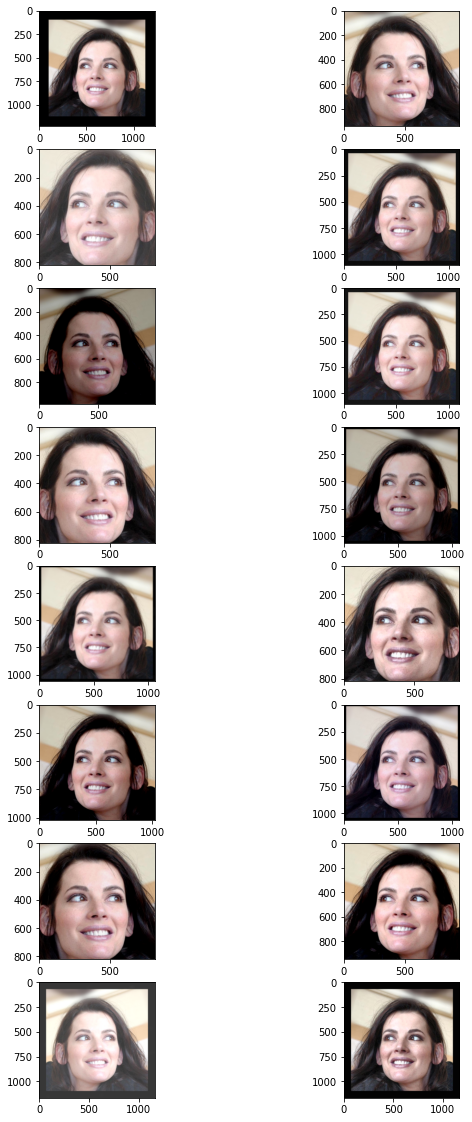

In [41]:
#aug_pipeline = aug.AugmentationPipeline(use_all_augmentations=True)
aug_pipeline = aug.AugmentationPipeline()
#aug_pipeline = aug.AugmentationPipeline(use_all_augmentations=False, augmentation_keys=["brightness", "fancyPCA", "rain"])
#aug_pipeline = aug.AugmentationPipeline(use_all_augmentations=False, augmentation_keys=["brightness", "fancyPCA", "rain"], resize_augmentation_keys=["identity", "crop_0.1", "pad_0.1"])
#aug_pipeline = aug.AugmentationPipeline(use_all_augmentations=False, resize_augmentation_keys=["identity", "crop_0.1", "pad_0.1"])
#aug_pipeline = aug.AugmentationPipeline(use_all_augmentations=False)

dataset = dl.CelebAFaceAutoencoderDataset(
    dataset_root=DATASET_PATH, 
    augmentation_pipeline=aug_pipeline,
)

draw_sample(48)
